In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged = transactions.merge(customers, on="CustomerID")

# Aggregate transaction data
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],  # Total spend, avg spend, transaction count
    'TransactionDate': lambda x: (pd.to_datetime('2025-01-01') - pd.to_datetime(x).max()).days,  # Recency
}).reset_index()

customer_features.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'TransactionCount', 'Recency']

# Normalize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))


In [3]:
# Apply K-Means Clustering
k = 4  # Choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
customer_features['Cluster'] = clusters


C:\Users\Tharun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)

# Calculate Silhouette Score
silhouette = silhouette_score(scaled_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")


Davies-Bouldin Index: 0.9973378894992112
Silhouette Score: 0.3202798158336109


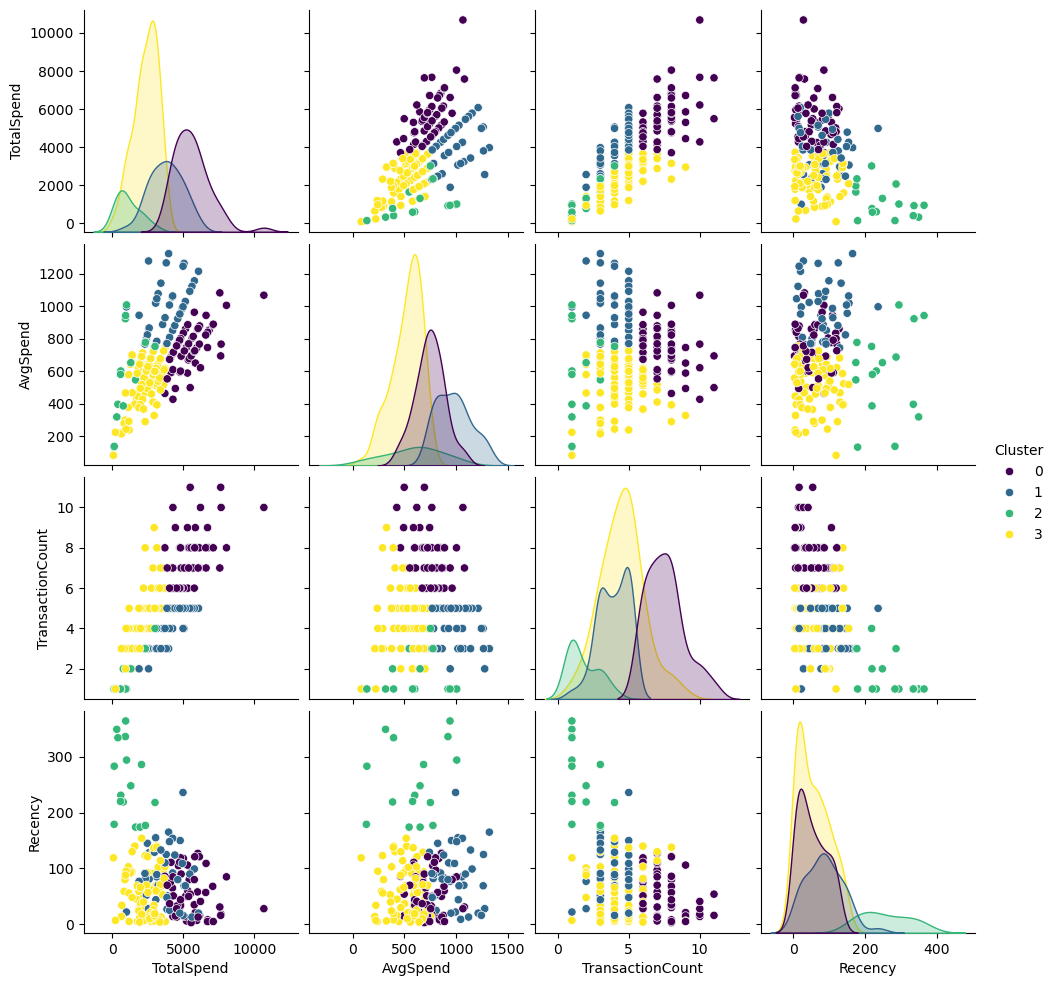

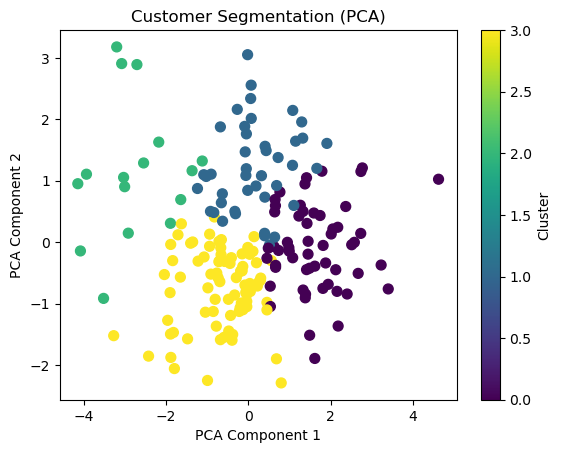

In [5]:
# Visualize clusters using pairplot
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

# 2D Scatter plot using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
